# HW03 (due October 17th 23:59)

The goal of this homework is to **predict** the value of houses in California starting from house and neighborhood caracteristics. 

Differently from last week's homework, we are not interested in investigating the causal effect of some features on house values, but the main purpose is to obtain good predictions of the values, so to train the best model to minimize the loss function. 

In [2]:
# Load Data
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()
print(data['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [3]:
X_full, y_full = data.data, data.target
n_samples = X_full.shape[0]
n_features = X_full.shape[1]
print(n_samples,n_features)

20640 8


# Summary Statistics

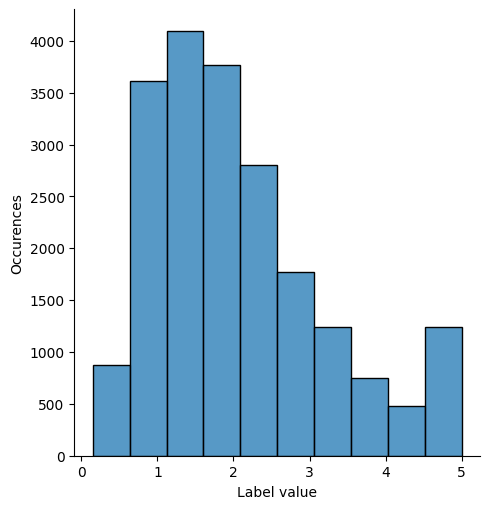

In [15]:
from seaborn import displot
import seaborn as sns
# of y_full
# make a histogram of the label variable
labelHist = displot(y_full, kde=False, bins=10)
labelHist.set_axis_labels(x_var="Label value",y_var="Occurences")


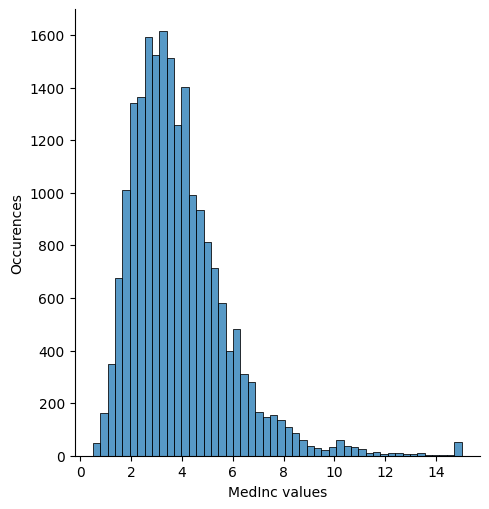

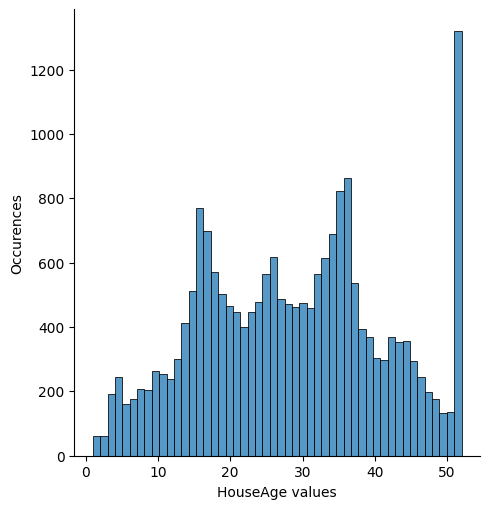

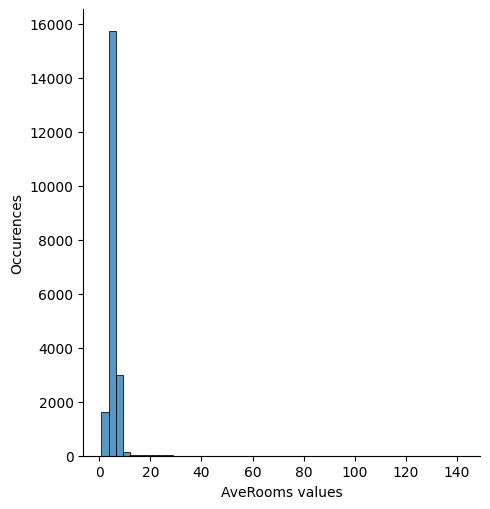

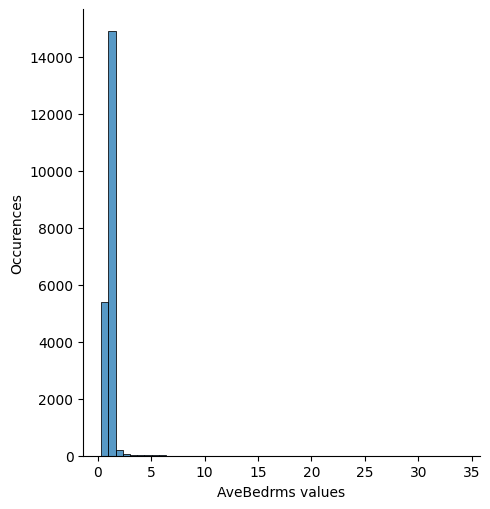

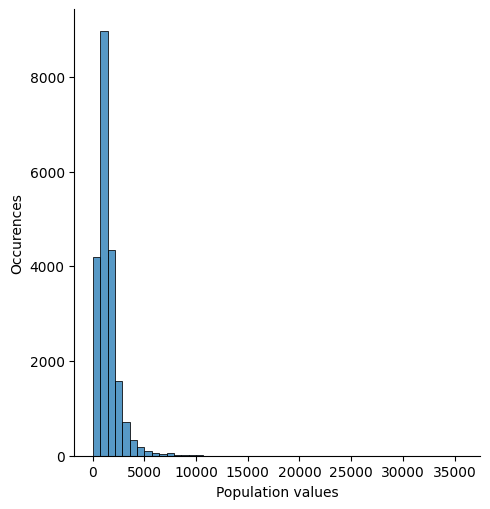

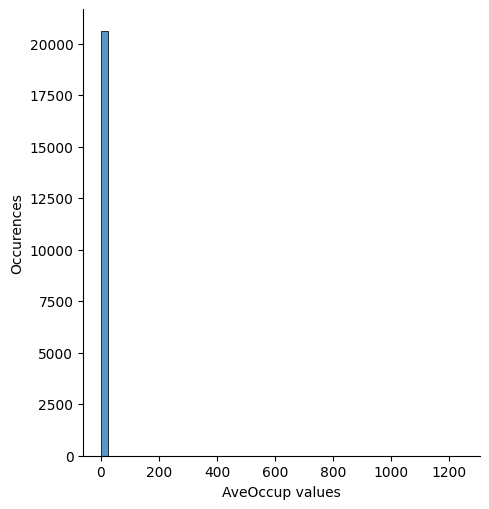

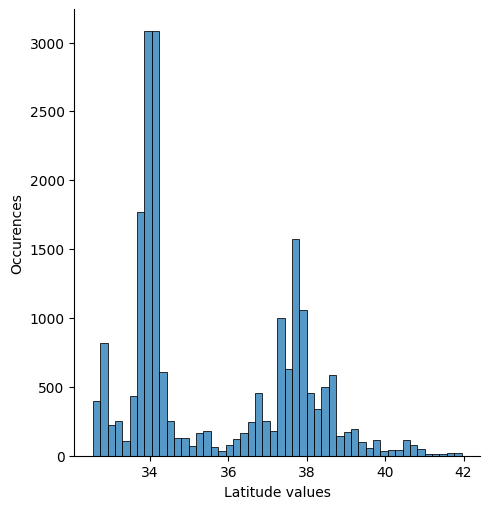

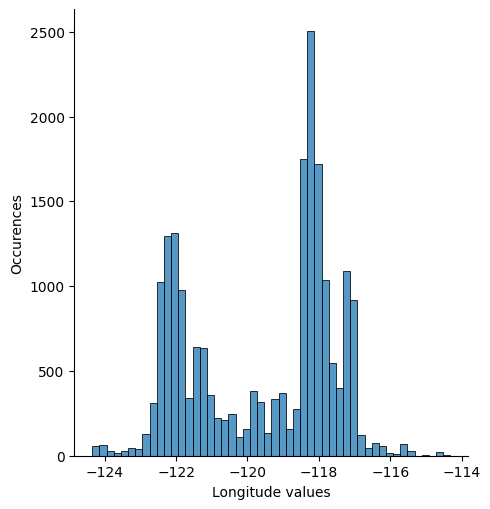

In [25]:
# make histograms of all predictors
for i in range(len(X_full[0])):
    predData = [row[i] for row in X_full]
    Hist = displot(predData, kde=False, bins=50)
    Hist.set_axis_labels(x_var=data.feature_names[i] + " values",y_var="Occurences")
    


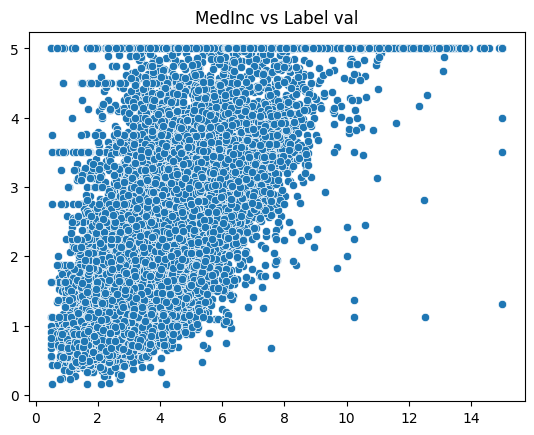

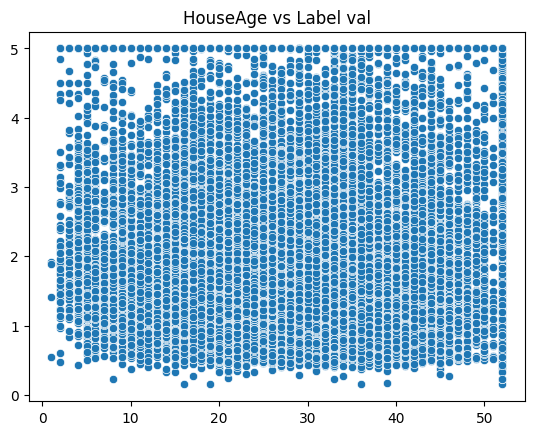

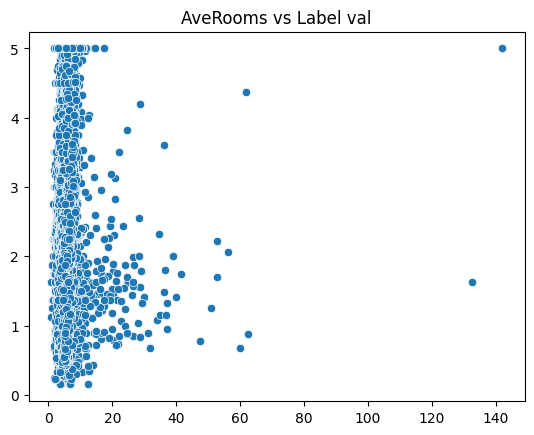

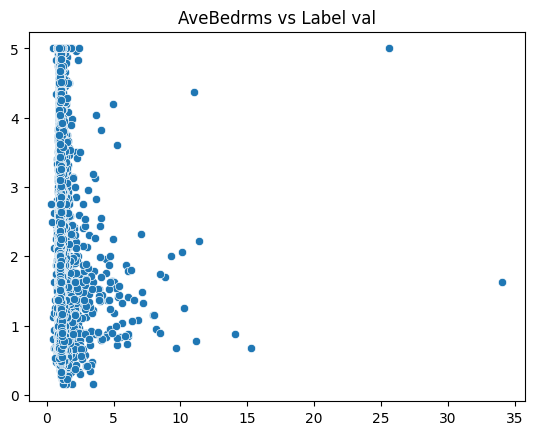

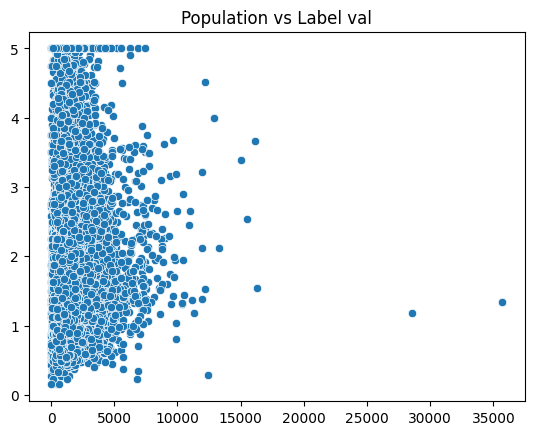

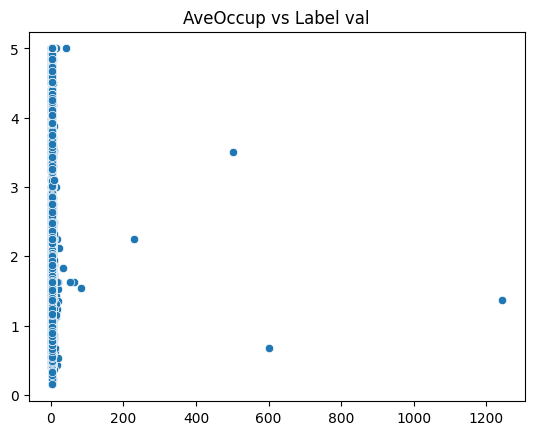

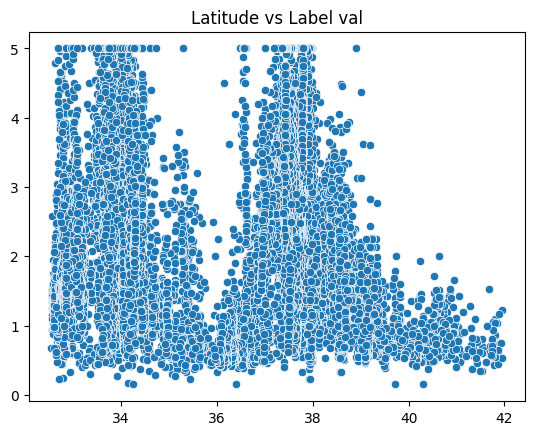

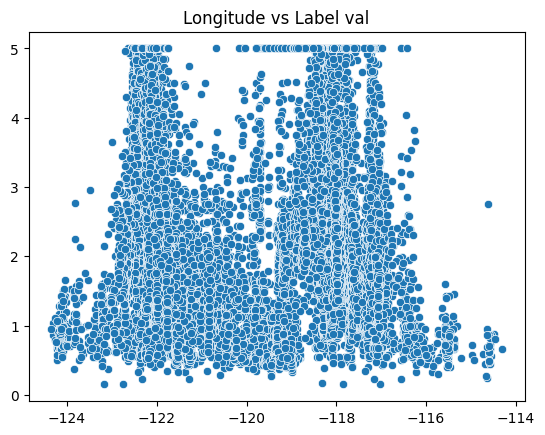

In [42]:
from seaborn import scatterplot
import matplotlib.pyplot as plt

# make scatterplots of all predictors with the label

# Loop through each feature and create a scatterplot
for i, attribute in enumerate(X_full.T):
    scatterplot(x=attribute, y=data.target)
    plt.title(data.feature_names[i] + " vs Label val")
    plt.show()


# Train/Test Split

In [43]:
from sklearn.model_selection import train_test_split
# Split the data into 80% training and 20% test
X_train, X_test, y_train, y_test = train_test_split(X_full,y_full,test_size=.2)


# Pre-Processing

In [54]:
from sklearn.preprocessing import StandardScaler
# produce standardized predictors with mean zero and variance one 
# fit the transformer in the training set and apply to the whole data
norm = StandardScaler()
normData = norm.fit(X_train)
X_train_norm = norm.transform(X_train)
X_test_norm = norm.transform(X_test)

In [80]:
from sklearn.preprocessing import PolynomialFeatures
# produce quadratic polynomial features from all standardized predictors
# squared values and pairwise interactions 
# fit the transformer in the training set and apply to the whole data
polynom = PolynomialFeatures(2)
polynom.fit(X_train_norm)
X_train_poly = polynom.transform(X_train_norm)
X_test_poly = polynom.transform(X_test_norm)

## Fractional Ridge Regression
https://arxiv.org/abs/2005.03220

https://nrdg.github.io/fracridge/

In [57]:
%pip install fracridge

  Obtaining dependency information for numba from https://files.pythonhosted.org/packages/c6/14/7399ae5b4d74301cfaf596ef9fd02041bbcc8fc5e8df184d881afc0de809/numba-0.58.0-cp311-cp311-macosx_10_9_x86_64.whl.metadata
  Obtaining dependency information for setuptools-scm from https://files.pythonhosted.org/packages/0e/a3/b9a8b0adfe672bf0df5901707aa929d30a97ee390ba651910186776746d2/setuptools_scm-8.0.4-py3-none-any.whl.metadata
  Obtaining dependency information for llvmlite<0.42,>=0.41.0dev0 from https://files.pythonhosted.org/packages/de/48/ff1ef8b41397522f6651b85efb39339e8cd3ba2a9154731242a751e1f8c6/llvmlite-0.41.0-cp311-cp311-macosx_10_9_x86_64.whl.metadata
  Obtaining dependency information for numpy<1.26,>=1.21 from https://files.pythonhosted.org/packages/c9/57/3cb8131a0e6d559501e088d3e685f4122e9ff9104c4b63e4dfd3a577b491/numpy-1.25.2-cp311-cp311-macosx_10_9_x86_64.whl.metadata
  Obtaining dependency information for typing-extensions from https://files.pythonhosted.org/packages/24/21/7

In [59]:
from fracridge import FracRidgeRegressorCV
from sklearn.metrics import mean_squared_error, r2_score

In [109]:
# train fractional ridge on raw predictors
frcvRaw = FracRidgeRegressorCV(jit=False)
frcvRaw.fit(X_train,y_train)
# report the chosen fraction penalty
print("Chosen fraction penalty:",frcvRaw.alpha_[0][0])
# report MSE and r-squared in test set 
print("MSE:",mean_squared_error(y_test,frcvRaw.predict(X_test)))
print("r-squared:",r2_score(y_test,frcvRaw.predict(X_test)))

Chosen fraction penalty: 6441.7208230810475
MSE: 4.963254568131836
r-squared: -2.7344876105571396


In [110]:
# train fractional ridge on stanardized predictors
frcvStand = FracRidgeRegressorCV(jit=False)
frcvStand.fit(X_train_norm,y_train)
# report the chosen fraction penalty
print("Chosen fraction penalty:",frcvStand.alpha_[0][0])
# report MSE and r-squared in test set 
print("MSE:",mean_squared_error(y_test,frcvStand.predict(X_test_norm)))
print("r-squared:",r2_score(y_test,frcvStand.predict(X_test_norm)))

Chosen fraction penalty: 6441.720823183694
MSE: 4.963254568134083
r-squared: -2.7344876105588307


In [111]:
# train fractional ridge on standardized predictors including quadratics and interactions
frcvPoly = FracRidgeRegressorCV(jit=False)
frcvPoly.fit(X_train_poly,y_train)
# report the chosen fraction penalty
print("Chosen fraction penalty:",frcvPoly.alpha_[0][0])
# report MSE and r-squared in test set 
print("MSE:",mean_squared_error(y_test,frcvPoly.predict(X_test_poly)))
print("r-squared:",r2_score(y_test,frcvPoly.predict(X_test_poly)))

Chosen fraction penalty: 22495.75979233101
MSE: 1.664829490231155
r-squared: -0.2526629492024195


In [85]:
from seaborn import regplot

Quadratic


Standardized
Raw


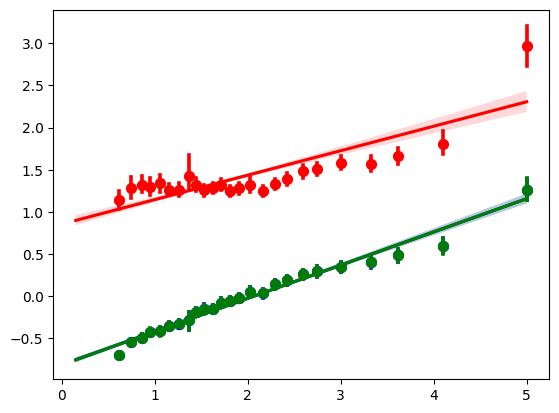

In [115]:
# report a binned regplot of the true outcome versus predictions in the test set
print("Quadratic")
plotPoly = regplot(x=y_test,y=frcvPoly.predict(X_test_poly),x_bins=25,color="red")
print("Standardized")
plotStand = regplot(x=y_test,y=frcvStand.predict(X_test_norm),x_bins=25,color="blue")
print("Raw")
plotRaw = regplot(x=y_test,y=frcvRaw.predict(X_test),x_bins=25,color="green")


**How do the results change when using different predictors? Which one do you think is the best model for this task? Explain.**

The polynomial predictor did a better job predicting because it had the most accurate intercept, but similar slope as the other 2 models. The other two models were extremely similar. 